 ## Counting active motors
In this notebook, we use cytosim analysis to analyze a simulation where two asters interacts.
We want to know the number of active motors as a function of time

### Reading config and reports
Here we read a simulation example from the package

In [1]:
import pkg_resources as pk
couples_file=pk.resource_filename( "cytolysis" , 'example_data/couples_states.txt')
config_file=pk.resource_filename( "cytolysis" , 'example_data/example.cym')

### Creating a representation of the simulation

In [2]:
from cytolysis import cytosim_analysis as ana
motor_reports = {"state": couples_file}
couples = {"complex": motor_reports}

# Creating simulation representation
simul = ana.Simulation(couples_report=couples, config=config_file)

### Analyzing the simulation 
No that we have a representation of the simulation, we can analyze it. Here we define a function to count the number of active motors

In [3]:
def count_active_couples(frame):
    return sum([1 for couple in frame.objects["couple"]["complex"] if couple.state==2])

analyzer = {'active_couples': count_active_couples } 
simul.make_analysis(frame_analyzer=analyzer)
analysis = simul.frames_analysis
analysis[0:5]

id active_couples
0  0              0
1  1              0
2  2              0
3  3              2
4  4              2

### Plotting analysis results
Here we use the module matplotlib (pip install matplotlib) to plot results, because it can use pandas column.

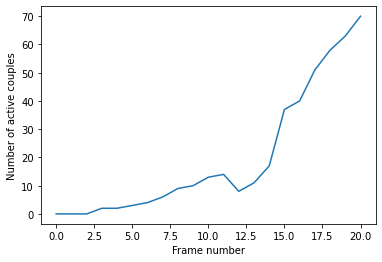

In [4]:
import matplotlib.pyplot as plt
plt.plot(analysis["id"],analysis["active_couples"])
plt.xlabel("Frame number")
plt.ylabel("Number of active couples")
plt.show()   